In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.constants as const
import scipy.fftpack as ft
from numpy import linalg as LA
import time
from matplotlib import animation
from IPython.display import HTML

In [3]:
class state:
    def __init__(self,initial,V,Ekin):
        self.ini=initial
        self.Psi=initial
        self.V=V
        self.V0=V
        self.Ekin=Ekin
        self.t=0
    def advance(self,dt):
        Psi = np.exp(-1j*self.V*dt)*self.Psi        # advance in real-space
        Psik = ft.fftshift(ft.fft(self.Psi))           # Fourier transform
        Psik = np.exp(-1j*self.Ekin*dt)*Psik      # advance in Fourier space
        self.Psi = ft.ifft(ft.fftshift(Psik))          # return to real space
        self.t+=dt
    def get(self):
        return self.Psi
    def reset(self):
        self.Psi=self.ini
        self.t=0
        self.V=self.V0

In [58]:
m = 938.28/0.511/2

L = 30
Ngrid = 600
#x space
dx = L/(Ngrid)
x = np.linspace(dx,L,Ngrid)

#k space
k = ft.fftfreq(x.size,d = dx)
k = 2*np.pi*ft.fftshift(k)
dk = np.diff(k).mean()
k0=0
# define potential (in real space) and kinetic energy (in k-space)

## potential well with high walls
_,Vpot=np.loadtxt('data/H2p_pot_gerade.dat',unpack=True)

Ekin = k**2/(2*m)
#Vpot=x**2
_,Psi = np.loadtxt('data/H2nuclwf.dat',unpack=True)
#normalize
#Psi = Psi/np.sqrt(np.sum(np.abs(Psi)**2))
#Psi=np.exp(-(x-4)**2/(4*.2**2) + 1j*0*x)
Psi=Psi/np.linalg.norm(Psi)

#Psik = ft.fftshift(ft.fft(Psi))
#Psik = np.roll(Psik,np.int(np.round(k0/dk)))
#Psi = ft.ifft(ft.fftshift(Psik))

Psi=state(Psi[:Ngrid],Vpot[:Ngrid],Ekin)

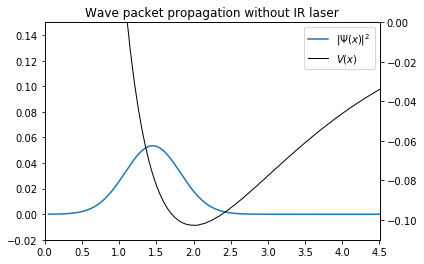

In [60]:
dt=5e-1
fig, ax1 = plt.subplots()
# add axis specifications
line, = ax1.plot([],[],label='$|\Psi(x)|^2$')
plt.ylim(-.02,.15)
plt.xlim(0,4.5)
ax2=ax1.twinx()
plt.ylim(-.11,0)
linePot, = ax2.plot(x,Vpot[:Ngrid],color='black',lw=1,label='$V(x)$')
plt.legend()
plt.xlabel('x')
#plt.ylabel('wave function')
plt.title('Wave packet propagation without IR laser')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
Psi.reset()
def animate(t):
    Psi.advance(dt)
    line.set_data(x,np.abs(Psi.get())**2)
    return (line,)

anim = animation.FuncAnimation(fig, animate,
                               frames=np.arange(0,100,dt), # t-values
                               interval=50, # wait time before displaying new frame in ms
                               blit=True)
#anim.save('propagation.mp4')
HTML(anim.to_jshtml())